## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,649,706
Trainable params: 1,649,706
Non-trainable params: 0
____________________________________

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,649,706
Trainable params: 1,649,706
Non-trainable params: 0
____________________________________

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,649,706
Trainable params: 1,649,706
Non-trainable params: 0
____________________________________

/Users/madking/anaconda3/envs/test_py3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106847). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 213us/step - loss: 1.6065 - acc: 0.4321 - val_loss: 1.6313 - val_acc: 0.4172
Epoch 41/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6010 - acc: 0.4334 - val_loss: 1.6279 - val_acc: 0.4242
Epoch 42/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5960 - acc: 0.4356 - val_loss: 1.6280 - val_acc: 0.4221
Epoch 43/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5916 - acc: 0.4372 - val_loss: 1.6021 - val_acc: 0.4338
Epoch 44/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.5855 - acc: 0.4390 - val_loss: 1.6013 - val_acc: 0.4356
Epoch 45/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.5805 - acc: 0.4419 - val_loss: 1.5911 - val_acc: 0.4394
Epoch 46/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5765 - acc: 0.4422 - val_loss: 1.5985 - val_acc: 0.4335
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 11s 217us/step - loss: 2.0037 - acc: 0.2961 - val_loss: 2.0004 - val_acc: 0.2992
Epoch 41/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.9986 - acc: 0.2992 - val_loss: 1.9953 - val_acc: 0.2999
Epoch 42/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9936 - acc: 0.3005 - val_loss: 1.9904 - val_acc: 0.3026
Epoch 43/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.9888 - acc: 0.3017 - val_loss: 1.9857 - val_acc: 0.3037
Epoch 44/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9840 - acc: 0.3024 - val_loss: 1.9811 - val_acc: 0.3043
Epoch 45/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.9793 - acc: 0.3042 - val_loss: 1.9764 - val_acc: 0.3064
Epoch 46/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9747 - acc: 0.3056 - val_loss: 1.9723 - val_acc: 0.3075
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 11s 213us/step - loss: 2.2783 - acc: 0.1436 - val_loss: 2.2780 - val_acc: 0.1388
Epoch 41/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.2777 - acc: 0.1440 - val_loss: 2.2774 - val_acc: 0.1396
Epoch 42/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.2771 - acc: 0.1443 - val_loss: 2.2768 - val_acc: 0.1410
Epoch 43/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.2766 - acc: 0.1452 - val_loss: 2.2762 - val_acc: 0.1415
Epoch 44/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2760 - acc: 0.1459 - val_loss: 2.2756 - val_acc: 0.1424
Epoch 45/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2754 - acc: 0.1465 - val_loss: 2.2750 - val_acc: 0.1432
Epoch 46/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.2749 - acc: 0.1471 - val_loss: 2.2745 - val_acc: 0.1440
Epoch 47/50
50000/50000 [=======

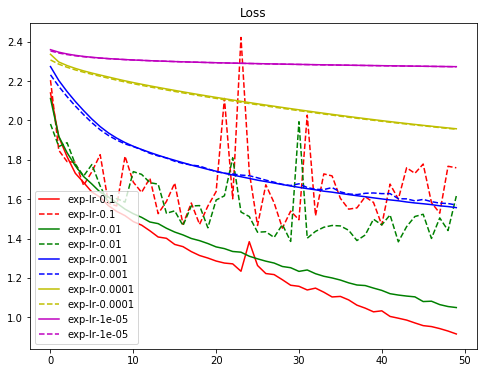

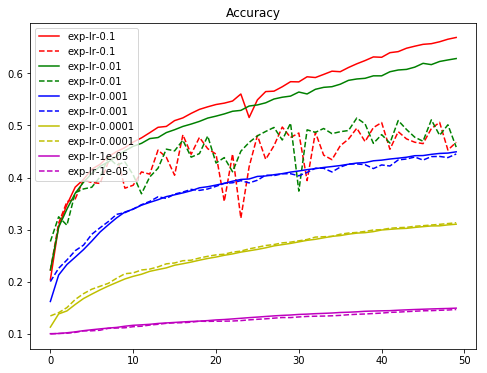

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()